In [1]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/postoperative-patient-data/post-operative.data'
"""
Attribute Information:
 1. L-CORE (patient's internal temperature in C):
              high (> 37), mid (>= 36 and <= 37), low (< 36)
     2. L-SURF (patient's surface temperature in C):
              high (> 36.5), mid (>= 36.5 and <= 35), low (< 35)
     3. L-O2 (oxygen saturation in %):
              excellent (>= 98), good (>= 90 and < 98),
              fair (>= 80 and < 90), poor (< 80)
     4. L-BP (last measurement of blood pressure):
              high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70)
     5. SURF-STBL (stability of patient's surface temperature):
              stable, mod-stable, unstable
     6. CORE-STBL (stability of patient's core temperature)
              stable, mod-stable, unstable
     7. BP-STBL (stability of patient's blood pressure)
              stable, mod-stable, unstable
     8. COMFORT (patient's perceived comfort at discharge, measured as
              an integer between 0 and 20)
     9. decision ADM-DECS (discharge decision):
              I (patient sent to Intensive Care Unit),
              S (patient prepared to go home),
              A (patient sent to general hospital floor)"""

names = ['L-CORE','L-SURF','L-O2','L-BP','SURF-STBL','CORE-STBL','BP-STBL','COMFORT','DECISION']
df=pd.read_csv(url, names=names,comment='#')
df

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,DECISION
0,mid,low,excellent,mid,stable,stable,stable,15,A
1,mid,high,excellent,high,stable,stable,stable,10,S
2,high,low,excellent,high,stable,stable,mod-stable,10,A
3,mid,low,good,high,stable,unstable,mod-stable,15,A
4,mid,mid,excellent,high,stable,stable,stable,10,A
5,high,low,good,mid,stable,stable,unstable,15,S
6,mid,low,excellent,high,stable,stable,mod-stable,05,S
7,high,mid,excellent,mid,unstable,unstable,stable,10,S
8,mid,high,good,mid,stable,stable,stable,10,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10,S


converting the COMFORT column to a form that can be read with isnull and ? values to NaN

In [2]:
df.COMFORT = df.COMFORT.apply(pd.to_numeric,errors='coerce')

checking the number of NaN values in the COMFORT column, which should amount to 3 according to the data set description

In [3]:
df.isnull().sum()

L-CORE       0
L-SURF       0
L-O2         0
L-BP         0
SURF-STBL    0
CORE-STBL    0
BP-STBL      0
COMFORT      3
DECISION     0
dtype: int64

imputing the NaN values by using the mean values of the COMFORT column, this can be observed by the values below with numbers past the decimal point. Replacing the missing values with the mean values will provide a better visualization of COMFORT data being compared to the categorical features.

imputation seemed the better method compared to dropping the missing data as out of 90 data points in the COMFORT column, only 3 are missing which seems insignificant enough to not require dropping them. If a large majority of the data points were missing I would consider dropping the data to be the better option.

In [4]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputed_data = imr.fit_transform(df[['COMFORT']])
imputed_data

array([[15.        ],
       [10.        ],
       [10.        ],
       [15.        ],
       [10.        ],
       [15.        ],
       [ 5.        ],
       [10.        ],
       [10.        ],
       [10.        ],
       [15.        ],
       [10.        ],
       [15.        ],
       [10.        ],
       [15.        ],
       [10.        ],
       [15.        ],
       [10.        ],
       [15.        ],
       [10.        ],
       [15.        ],
       [10.        ],
       [15.        ],
       [10.        ],
       [10.        ],
       [10.        ],
       [10.        ],
       [10.        ],
       [15.        ],
       [10.        ],
       [10.        ],
       [10.        ],
       [10.        ],
       [10.        ],
       [10.        ],
       [10.        ],
       [10.        ],
       [10.        ],
       [ 7.        ],
       [10.        ],
       [10.        ],
       [15.        ],
       [15.        ],
       [10.        ],
       [10.        ],
       [10

from the original data set it can be observed that row 70 had a ? value, checking to see if the imputed data is working correctly

In [5]:
imputed_data[70]

array([10.94252874])

changing the original COMFORT column with the newly imputed data, checking to see if the newly imputed data has been integrated into the dataset by looking at row 70's COMFORT number.

In [6]:
df["COMFORT"]=imputed_data
df

,L-CORE,L-SURF,L-O2,L-BP,SURF-STBL,CORE-STBL,BP-STBL,COMFORT,DECISION
0,mid,low,excellent,mid,stable,stable,stable,15.000000,A
1,mid,high,excellent,high,stable,stable,stable,10.000000,S
2,high,low,excellent,high,stable,stable,mod-stable,10.000000,A
3,mid,low,good,high,stable,unstable,mod-stable,15.000000,A
4,mid,mid,excellent,high,stable,stable,stable,10.000000,A
5,high,low,good,mid,stable,stable,unstable,15.000000,S
6,mid,low,excellent,high,stable,stable,mod-stable,5.000000,S
7,high,mid,excellent,mid,unstable,unstable,stable,10.000000,S
8,mid,high,good,mid,stable,stable,stable,10.000000,S
9,mid,low,excellent,mid,unstable,stable,mod-stable,10.000000,S


utilizing seaborn plots as they provide precise visualization to the data

In [7]:
import seaborn as sns
%matplotlib inline

using swarmplots to analyze the relationship between the categorical features and COMFORT

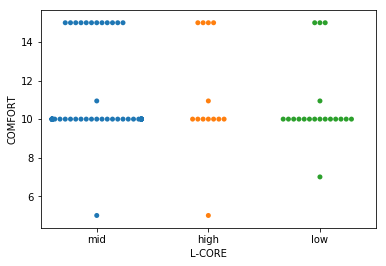

In [8]:
sns.swarmplot(x=df["L-CORE"],y=df["COMFORT"])


This graph shows that having the normal base internal temperature between 36C and 37C leads to the greatest comfort of the patients, which is accurate with physiological knowledge. An interesting result is that, taking into account the amount of patients with high and low core temperature, the greatest comfort only differed by 1 between the groups.

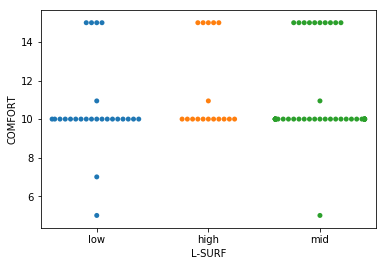

In [9]:
sns.swarmplot(x=df["L-SURF"],y=df["COMFORT"])


This graph shows there was slightly greater comfort with mid level surface temperature compared to low surface temperature. The high and low surface temperature comfort levels are relatively the same, however there were no patients under 10 with high temperature while there were 2 with low temperature.

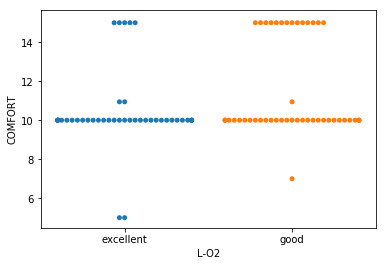

In [10]:
sns.swarmplot(x=df["L-O2"],y=df["COMFORT"])


An interesting result shows up on this graph as there were more higher comfort levels with a good O2 saturation level compared to excellent. This is not expected, however it is possible that the difference between the O2 saturation levels could have been miniscule. There were no measurements of O2 saturation that fell into the poor or the fair designations.

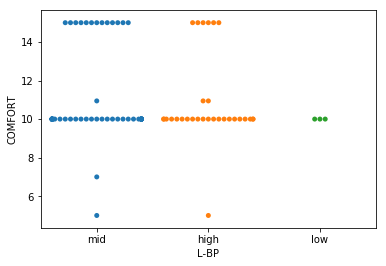

In [11]:
sns.swarmplot(x=df["L-BP"],y=df["COMFORT"])


This graph shows an expected result of the greater comfort for patients that have mid blood pressure levels as those levels are considered normal. The low blood pressure being in the middle of the comfort level is not necessarily expected, however there were only 3 patients with low blood pressure so it is hard to determine significant results of that.

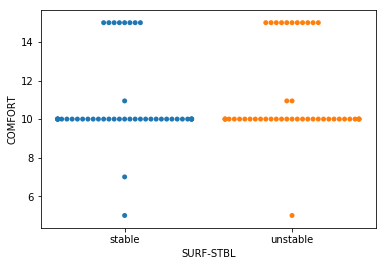

In [12]:
sns.swarmplot(x=df["SURF-STBL"],y=df["COMFORT"])


The stable and unstable surface temperature categories almost share the same distribution of comfort levels, however there are more patients with greater comfort in the unstable category compared to the stable one. This is difficult to gauge as the surface temperature of a human can vary depending on the body part the measurement is being taken and their environment, which could account for the unstable category.

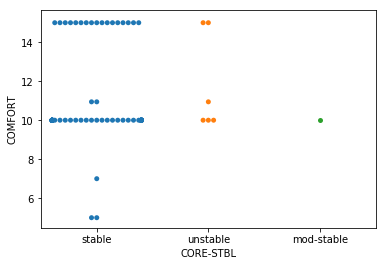

In [13]:
sns.swarmplot(x=df["CORE-STBL"],y=df["COMFORT"])


This graph shows that a majority of the patients had a stable core temperature and there is an even split between high and medium comfort in that category. There are low comfort levels in this category compared to unstable. The unstable core temperature patients also have an even split of high and medium comfort which is an unexpected result.

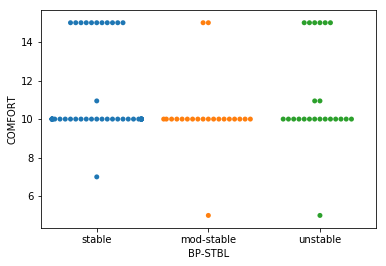

In [14]:
sns.swarmplot(x=df["BP-STBL"],y=df["COMFORT"])


The difference in comfort between unstable and stable blood pressure levels has relatively the same distribution with respect to the amount of patients in each category. It would be expected for unstable to have more patients with lower comfort levels compared to the other categories however, which is not reflected in the data.

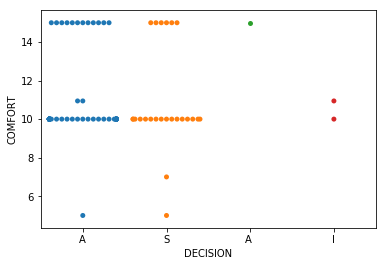

In [15]:
sns.swarmplot(x=df["DECISION"],y=df["COMFORT"])


examining the data showed the error caused in the plot above being due to a space after one of the 'A' values, it is removed for a better graph

In [16]:
df["DECISION"]=df["DECISION"].replace(["A "],["A"])

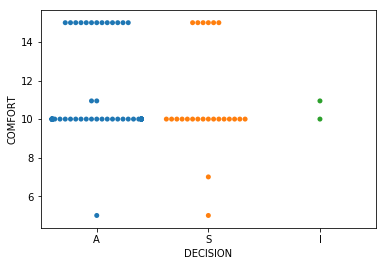

In [17]:
sns.swarmplot(x=df["DECISION"],y=df["COMFORT"])


The amount of patients admitted to general care and those sent home have the same comfort levels, with more patients with greater comfort in the hospital compared to those sent home. What is truly not expected is the patients sent to the ICU have medium levels of comfort, calling the validity of the comfort measurement into question.

Overall, the data is difficult to interpret significant results as a large majority of the patients fall into the medium comfort range, even if the compared categorical feature is not befitting of neutral comfort. It seems as if the comfort integer was not recorded with too much scrutiny as it usually falls in the 10 range, making the comparisons between comfort and other categorical features rather difficult. It is possible that the range of the integer is too large to determine the accurate comfort that a patient is feeling at that time, leaving a large amount of room for unnecessary assumption rather than precise data. Nothing can truly be determined from the data as the distributions between comfort levels remains near the same for each categorical feature.